#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**CH04A Management quality and firm size: describing patterns of association**

using the wms-management-survey dataset

version 1.0 2021-05-05

In [2]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


from py_helper_functions import *


In [3]:
import warnings

warnings.filterwarnings("ignore")


In [4]:
# Import data
df = pd.read_csv(data_in + "wms_da_textbook.csv")


In [5]:
# Sample selection
df = df.loc[
    (df["country"] == "Mexico")
    & (df["wave"] == 2013)
    & (df["emp_firm"] >= 100)
    & (df["emp_firm"] <= 5000)
]

In [6]:
df.emp_firm.describe()


count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

In [7]:
# Save workfile
df.to_csv(data_out + "ch04-wms-work.csv", index=False)
# Summary
df.filter(["management", "emp_firm"]).describe()


,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


### Figure 4.1 Distribution of the management score variable

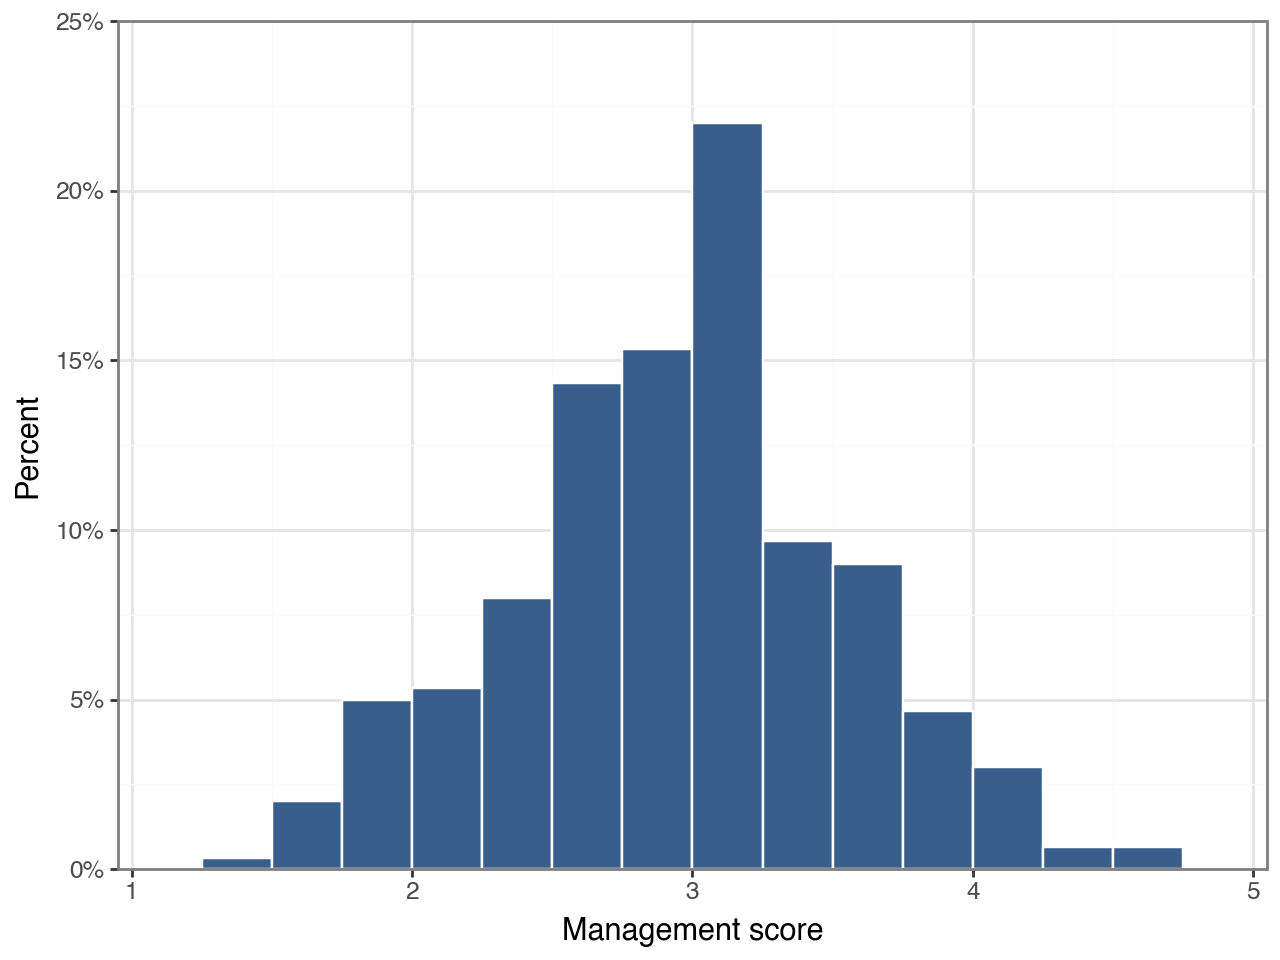

In [9]:
(
    ggplot(df, aes(x="management"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        fill=color[0],
        color="white",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Management score", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.25),
        breaks=seq(0, 0.26, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


### Figure 4.2 The distribution of employment

(a) Number of employees

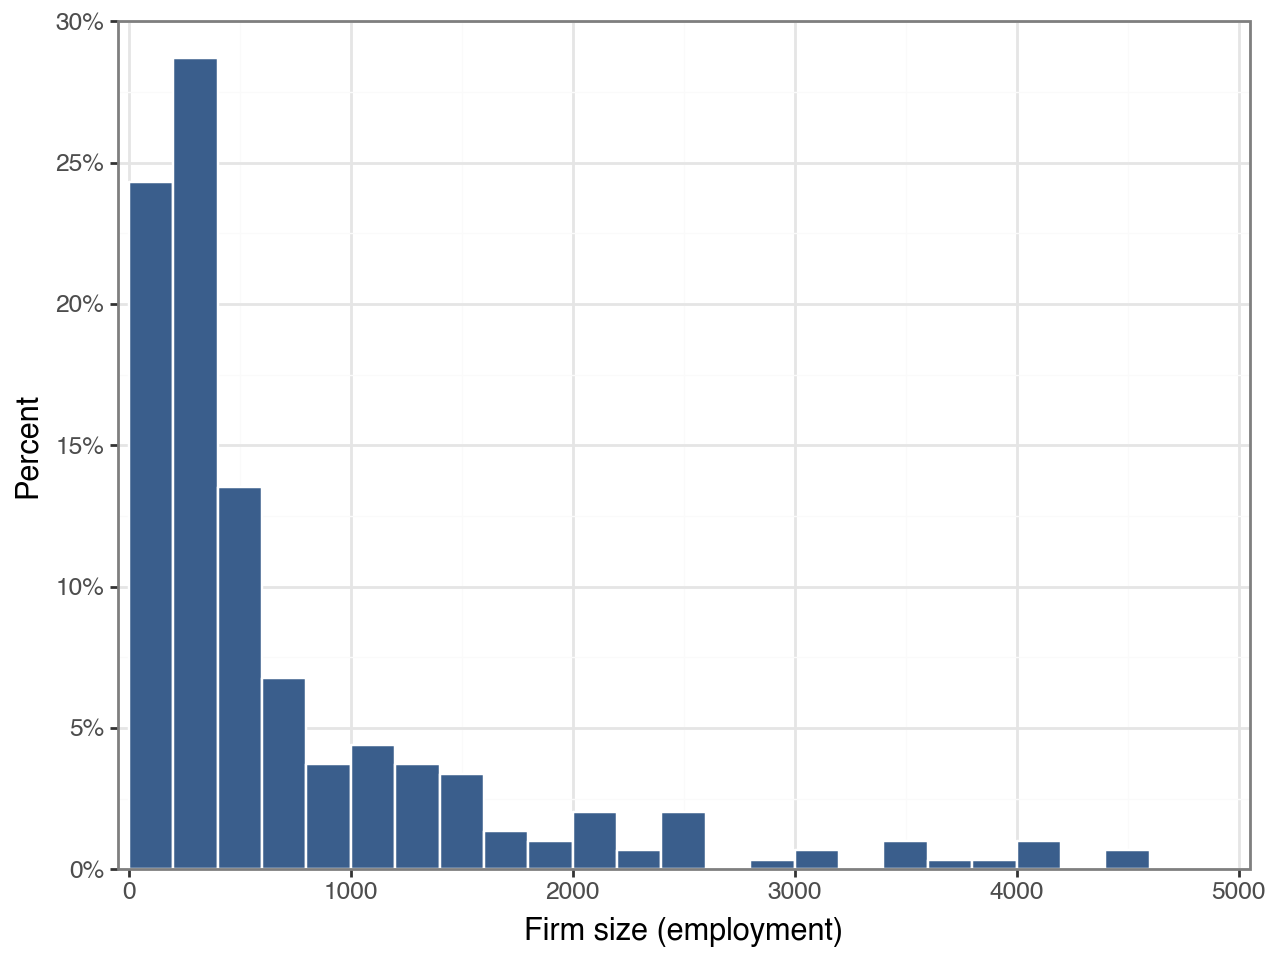

In [12]:
(
    ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
    )
    + labs(x="Firm size (employment)", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
    )
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.3),
        breaks=seq(0, 0.5, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


In [13]:
df["lnemp"] = np.log(df.emp_firm)
df["lnemp"].describe()


count    300.000000
mean       6.081850
std        0.992700
min        4.605170
25%        5.298317
50%        5.866432
75%        6.802395
max        8.517193
Name: lnemp, dtype: float64

(b) Natural log of number of employees

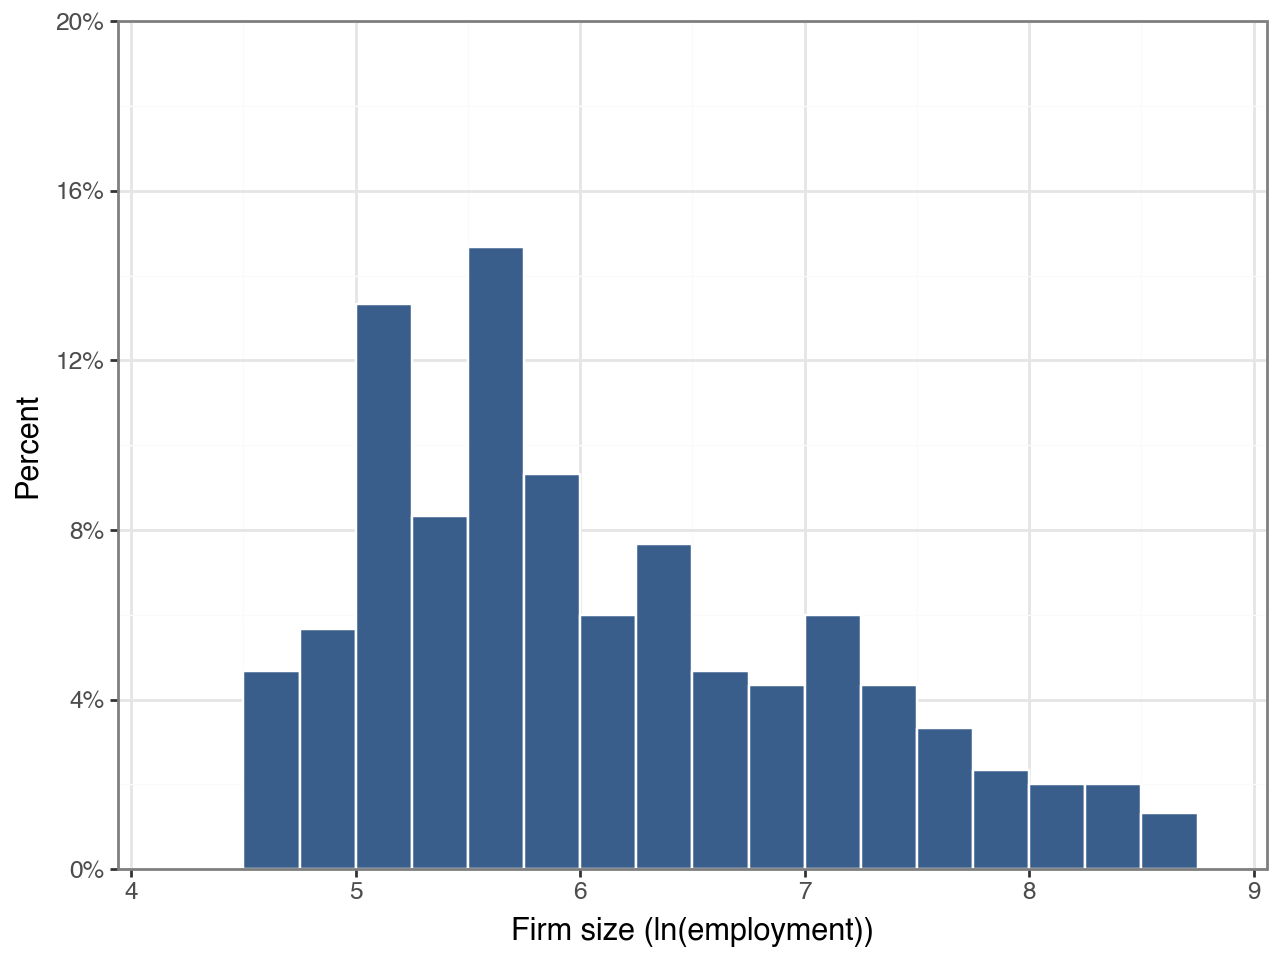

In [15]:
(
    ggplot(df, aes(x="lnemp"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        color="white",
        fill=color[0],
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Firm size (ln(employment))", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.2),
        breaks=seq(0, 0.2, by=0.04),
        labels=percent_format(),
    )
    + theme_bw()
)


In [16]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, np.nan)
df["emp3bins"] = np.where(
    (df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"]
)
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [17]:
df["emp3bins"].describe()


count    300.000000
mean       2.000000
std        0.693978
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

### Figure 4.3 Quality of specific management practices by three bins of firm size: conditional probabilities

(a) Lean management

In [20]:
df1 = (
    df.filter(["emp3bins", "lean1"])
    .groupby(["emp3bins", "lean1"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["lean1"] = pd.Categorical(
    df1["lean1"], categories=sorted(set(df1["lean1"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

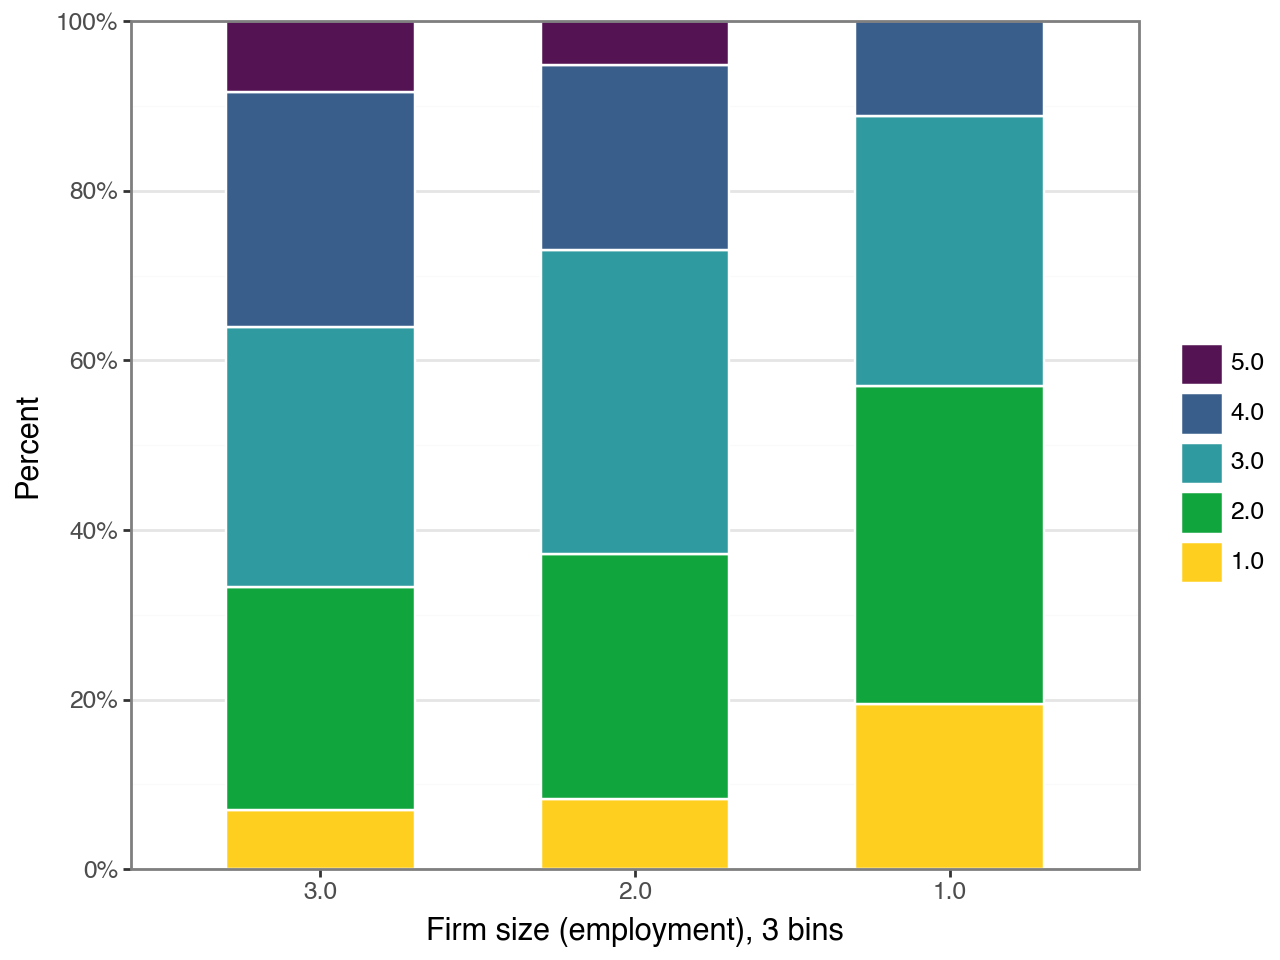

In [21]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=seq(0, 1.1, by=0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=(color[2], color[0], color[4], color[1], color[3]), name=" "
    )
)


(b) Performance tracking

In [23]:
df1 = (
    df.filter(["emp3bins", "perf2"])
    .groupby(["emp3bins", "perf2"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["perf2"] = pd.Categorical(
    df1["perf2"], categories=sorted(set(df1["perf2"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

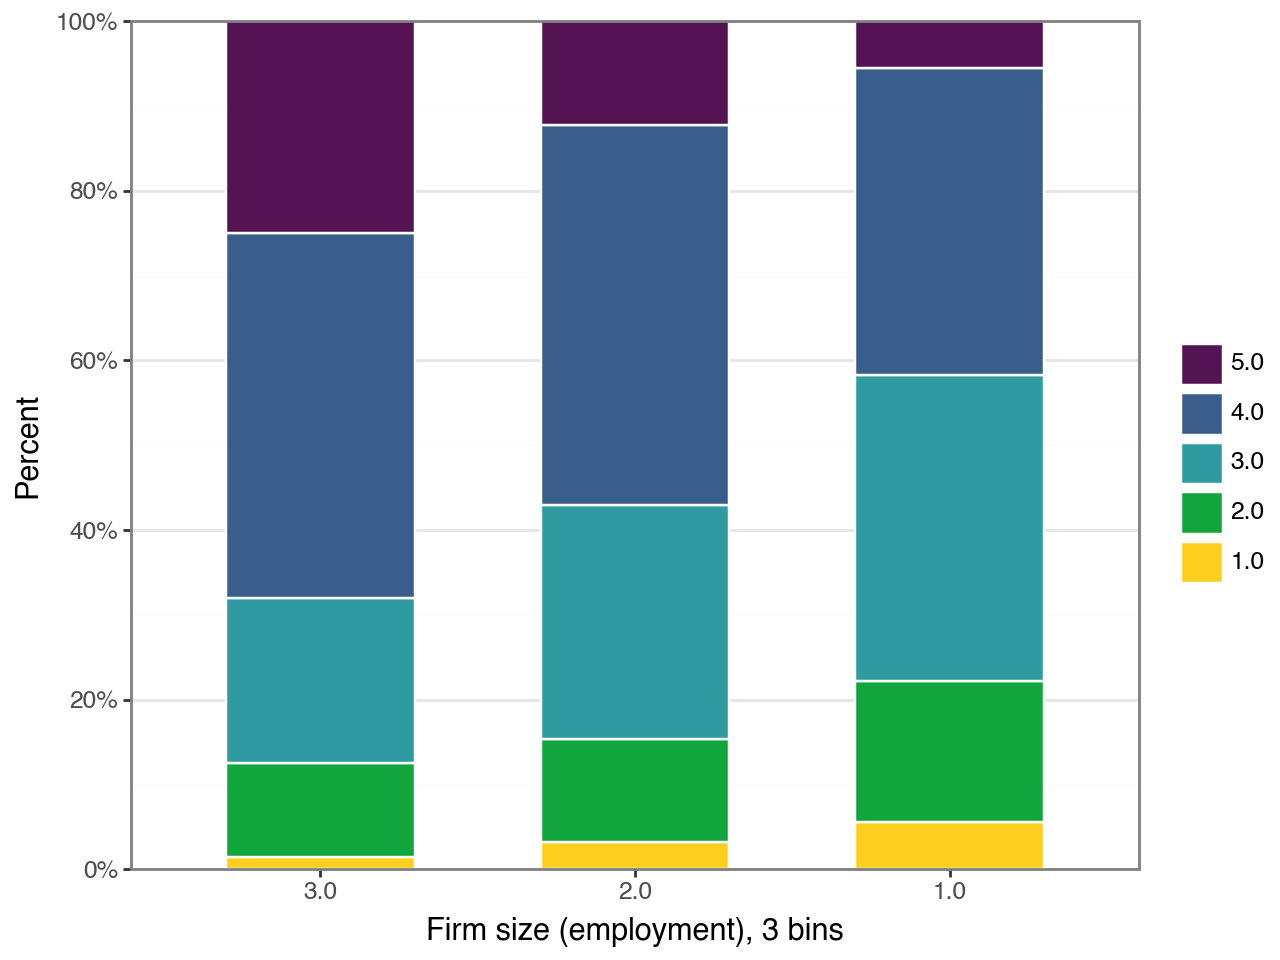

In [24]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="perf2"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=seq(0, 1.1, by=0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=(color[2], color[0], color[4], color[1], color[3]), name=" "
    )
)

In [25]:
# Bin scatters avg score by employment bins

# Option 1: create 3 bins as defined by thresholds

# Summary

df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
1.0,100.0,197.0,145.597222,150.0,26.397108,72
2.0,200.0,994.0,413.153846,353.0,190.397552,156
3.0,1000.0,5000.0,2130.652778,1650.0,1178.115578,72


In [26]:
# Recode employee bins
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)


In [27]:
# Summary
df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
150.0,100.0,197.0,145.597222,150.0,26.397108,72
600.0,200.0,994.0,413.153846,353.0,190.397552,156
3000.0,1000.0,5000.0,2130.652778,1650.0,1178.115578,72


In [28]:
# Generate variables by mean
df1 = (
    df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
)
df1


,emp3bins,management_emp3bins
0,150.0,2.679784
1,600.0,2.943732
2,3000.0,3.185957


### Figure 4.4 Mean management quality score and firm size

(a) Three bins of employment

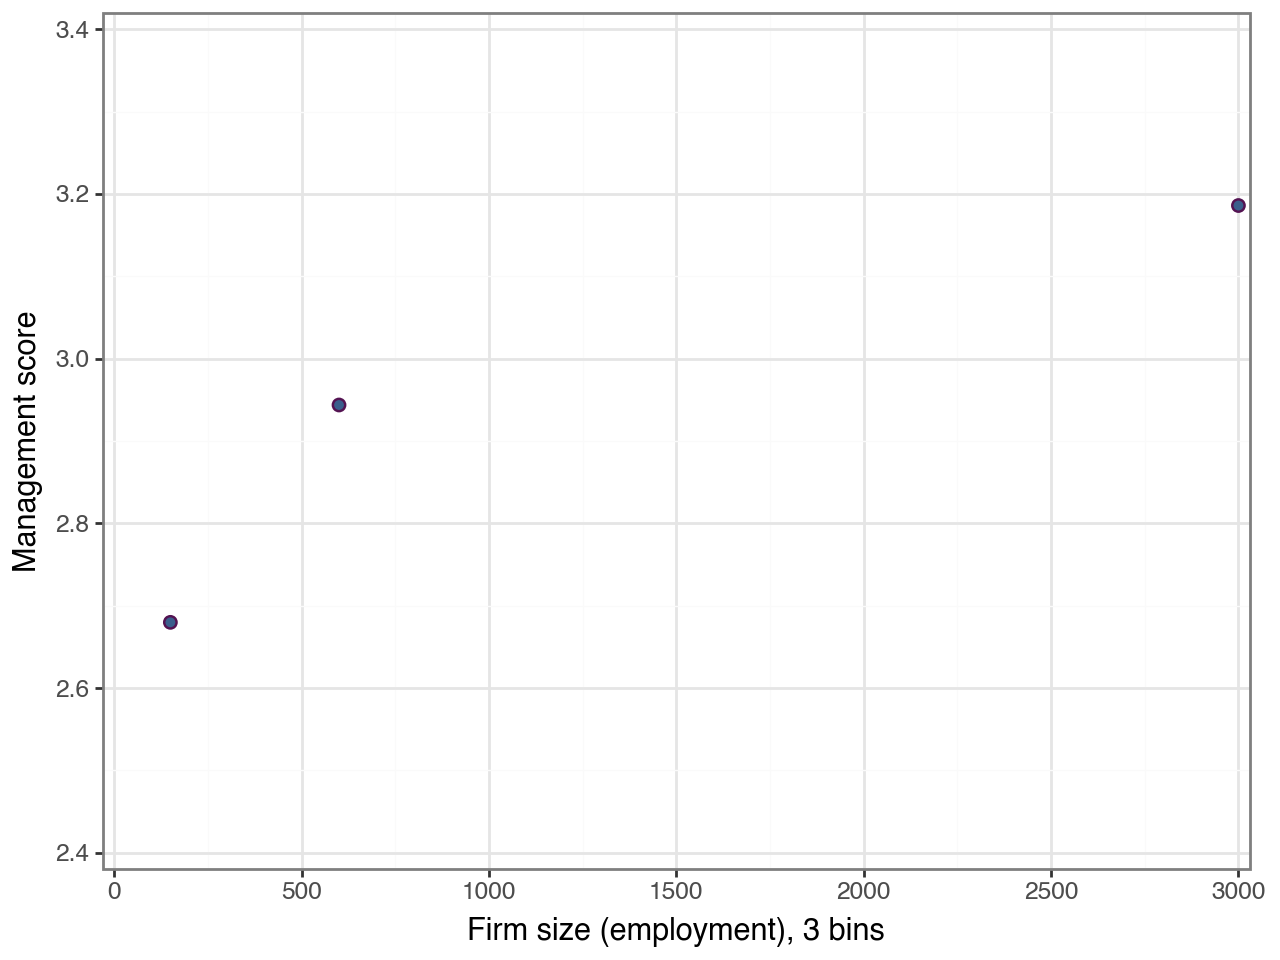

In [31]:
(
    ggplot(df1, aes(x="emp3bins", y="management_emp3bins"))
    + geom_point(size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.4, 3.4), breaks=seq(2.4, 3.5, by=0.2)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3000), breaks=seq(0, 3001, by=500)
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + theme_bw()
)


In [32]:
df["emp10bins"] = pd.qcut(df["emp_firm"], 10)


In [33]:
# Summary
df_summary = (
    df.filter(["emp_firm", "emp10bins"])
    .groupby("emp10bins")
    .agg(["min", "max", "mean", "median", np.std, "size"])
)
df_summary


emp_firm                                              
                      min     max         mean  median         std size
emp10bins                                                              
(99.999, 144.5]     100.0   140.0   118.566667   118.0   11.595729   30
(144.5, 180.0]      145.0   180.0   163.625000   160.0   12.947007   40
(180.0, 229.4]      184.0   228.0   204.000000   200.0   10.223811   20
(229.4, 278.0]      230.0   275.0   250.533333   250.0   11.607766   30
(278.0, 353.0]      280.0   350.0   310.266667   300.0   23.090427   30
(353.0, 500.0]      356.0   500.0   432.222222   405.0   50.747617   36
(500.0, 670.0]      520.0   670.0   583.240000   600.0   49.321463   25
(670.0, 1110.0]     700.0  1100.0   905.793103   900.0  137.250912   29
(1110.0, 2000.0]   1150.0  2000.0  1515.294118  1500.0  289.735881   34
(2000.0, 5000.0]   2100.0  5000.0  3438.730769  3500.0  982.115006   26

In [34]:
# Recode with bin means
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})


In [35]:
df.groupby("emp10bins")["emp_firm"].agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

,min,max,mean,median,std,size
emp10bins,,,,,,
118.566667,100.0,140.0,118.566667,118.0,11.595729,30
163.625000,145.0,180.0,163.625000,160.0,12.947007,40
204.000000,184.0,228.0,204.000000,200.0,10.223811,20
250.533333,230.0,275.0,250.533333,250.0,11.607766,30
310.266667,280.0,350.0,310.266667,300.0,23.090427,30
432.222222,356.0,500.0,432.222222,405.0,50.747617,36
583.240000,520.0,670.0,583.240000,600.0,49.321463,25
905.793103,700.0,1100.0,905.793103,900.0,137.250912,29
1515.294118,1150.0,2000.0,1515.294118,1500.0,289.735881,34


In [36]:
# Generate variables by mean
df1 = (
    df.groupby("emp10bins")
    .agg(management_emp10bins=("management", "mean"))
    .reset_index()
    .assign(emp10bins = lambda x: x["emp10bins"].astype(int))
)
df1


,emp10bins,management_emp10bins
0,118,2.588889
1,163,2.736111
2,204,2.727778
3,250,2.968519
4,310,2.953704
5,432,2.956790
6,583,3.000000
7,905,2.994253
8,1515,3.096405
9,3438,3.410256


(b) Ten bins of employment

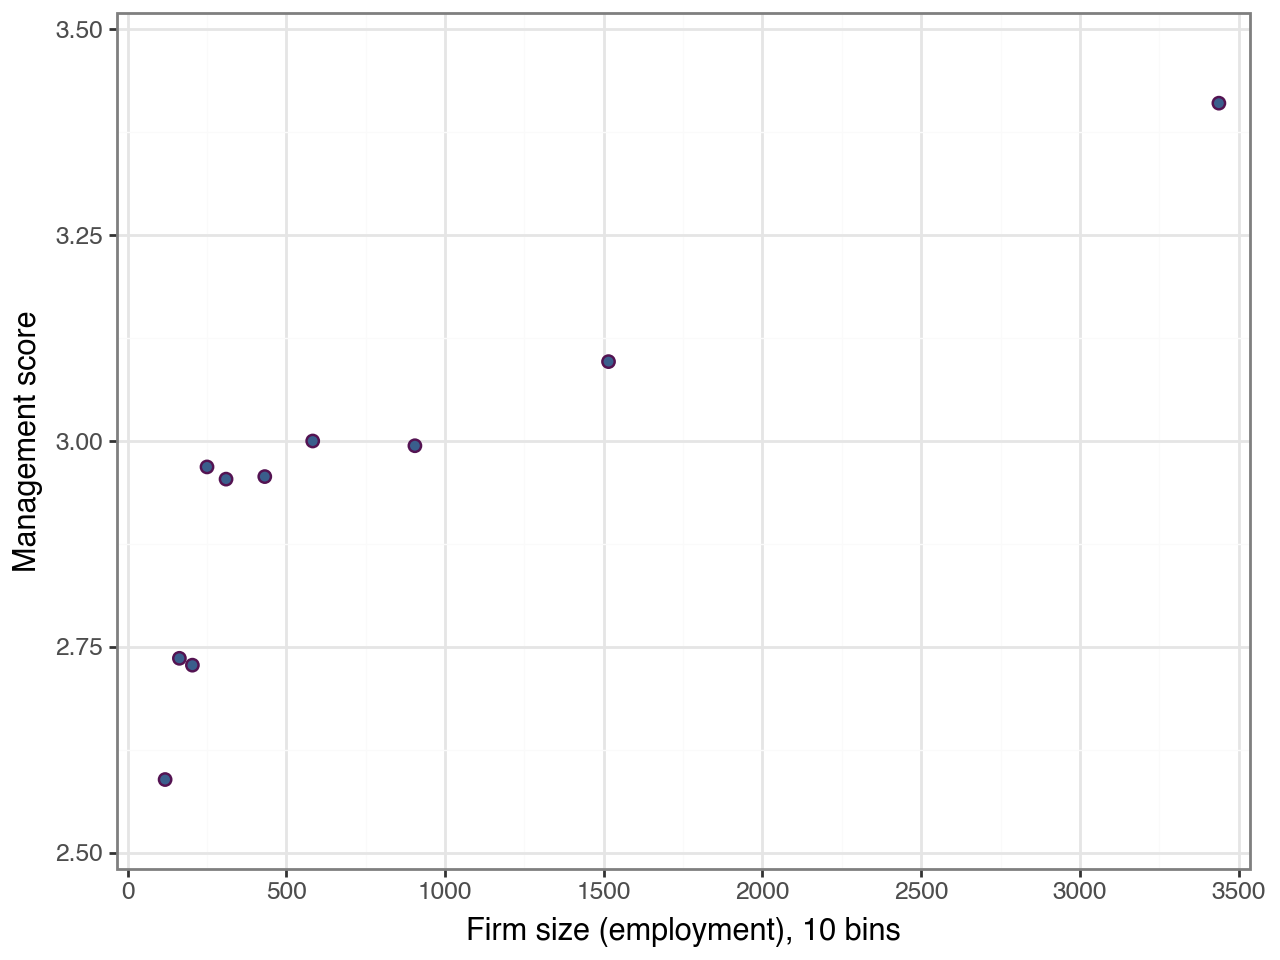

In [38]:
(
    ggplot(df1, aes(x="emp10bins", y="management_emp10bins"))
    + geom_point(size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=seq(2.5, 3.6, by=0.25)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3500), breaks=seq(0, 3501, by=500)
    )
    + labs(x="Firm size (employment), 10 bins", y="Management score")
    + theme_bw()
)


### Figure 4.5 The joint distribution of the management quality score and firm size

(a) By employment

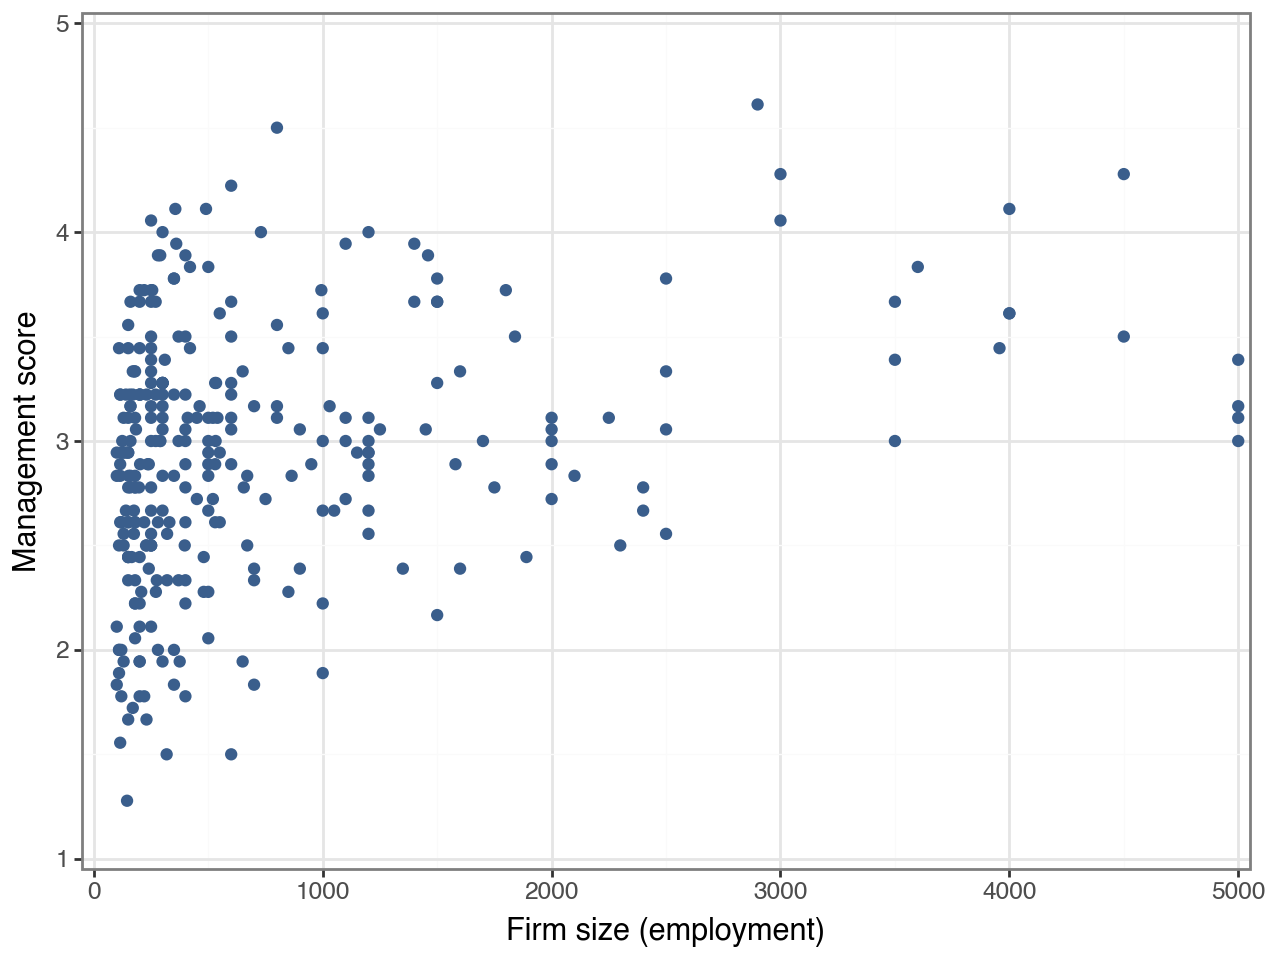

In [41]:
(
    ggplot(df, aes(x="emp_firm", y="management"))
    + geom_point(color=color[0], size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1))
    + labs(x="Firm size (employment)", y="Management score")
    + theme_bw()
)


(b) By log employment

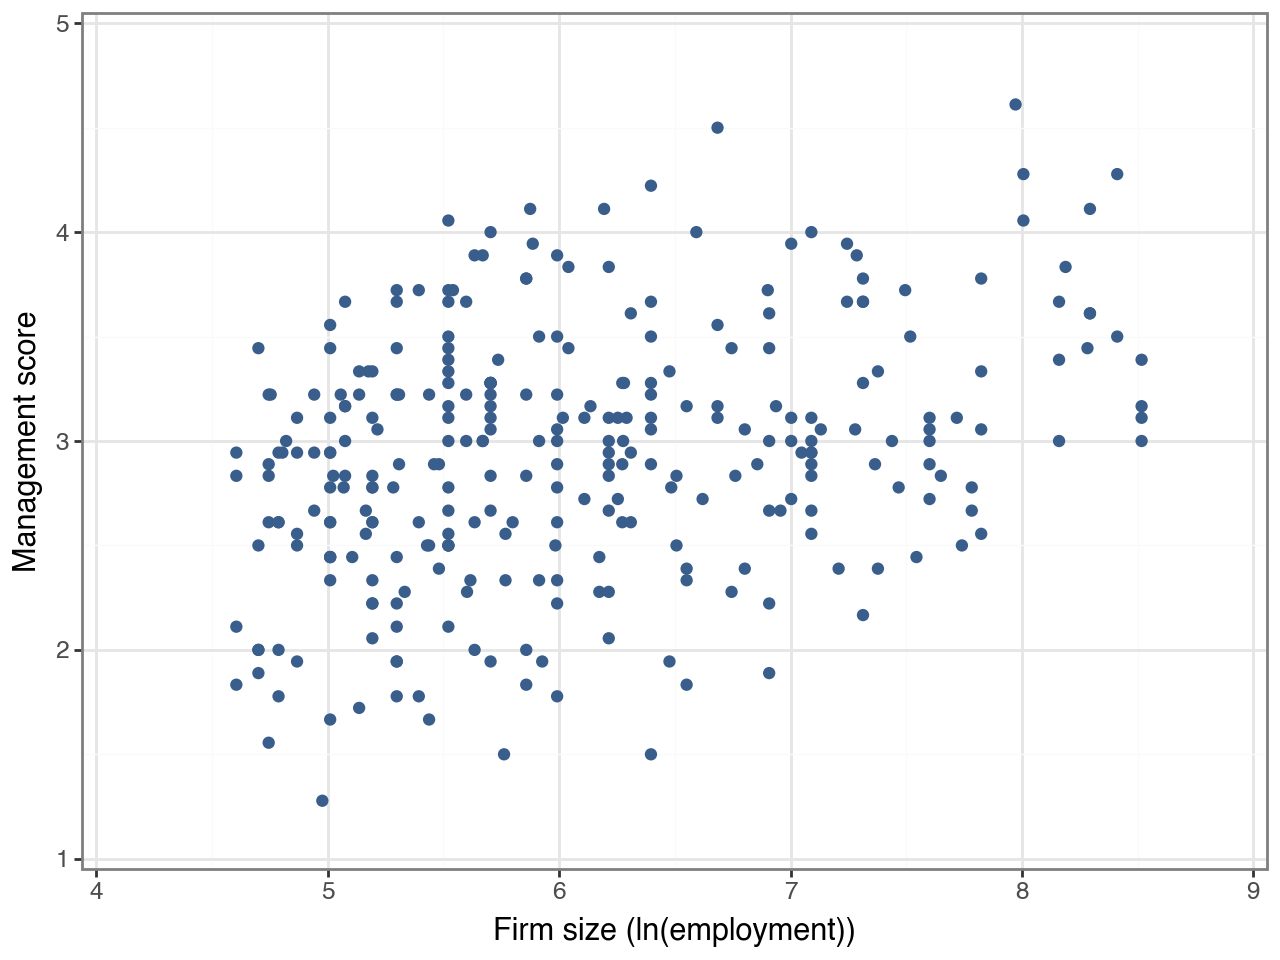

In [43]:
df["lnemp"] = np.log(df["emp_firm"])

(
    ggplot(df, aes(x="lnemp", y="management"))
    + geom_point(color=color[0], size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9), breaks=seq(4, 10, by=1))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1))
    + labs(x="Firm size (ln(employment))", y="Management score")
    + theme_bw()
)


### Figure 4.6 Conditional summary statistics of the management score by bins of firm size

In [45]:
df = df.replace({"emp3bins": {150: "Small", 600: "Medium", 3000: "Large"}})
df['emp3bins'] = pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))

Box plots

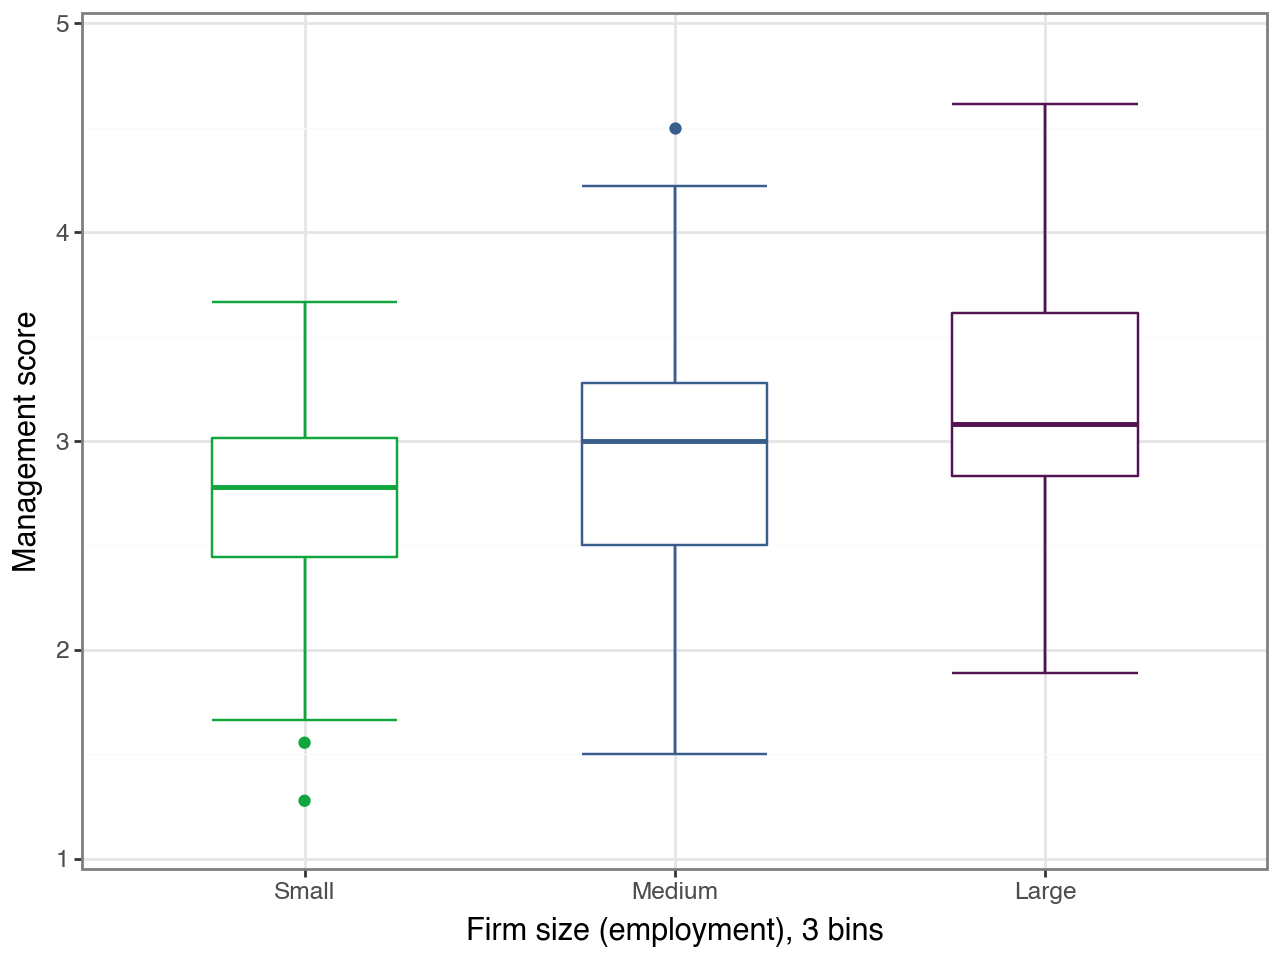

In [47]:
(
    ggplot(df, aes(x="emp3bins", y="management", group="emp3bins"))
    + stat_boxplot(
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0], color[2]),
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        color=(color[1], color[0], color[2]), size=0.5, width=0.5, na_rm=True
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 1))
    + theme_bw()
)

In [48]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set_style("whitegrid")

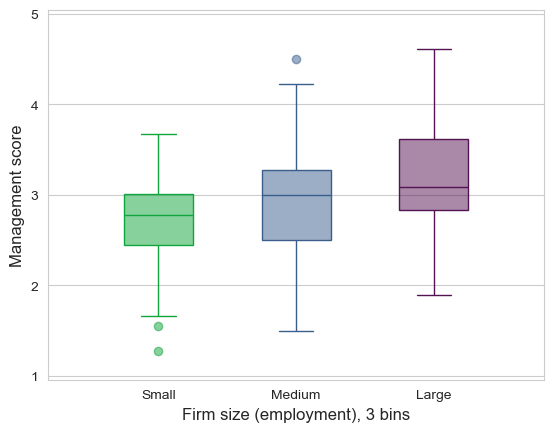

In [49]:
fig, ax = plt.subplots()
sns.boxplot(
    data=df, x="emp3bins", y="management", width=0.5, ax=ax, flierprops={"marker": "o"}
)

box_line_col = [color[1], color[0], color[2]]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.5))
    mybox.set_edgecolor(box_col)
    for j in range(i * 6, i * 6 + 6):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.5))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.5))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(seq(1, 5, 1))
add_margin(ax, x=0.1, y=0.01)
plt.show()

Violin plot

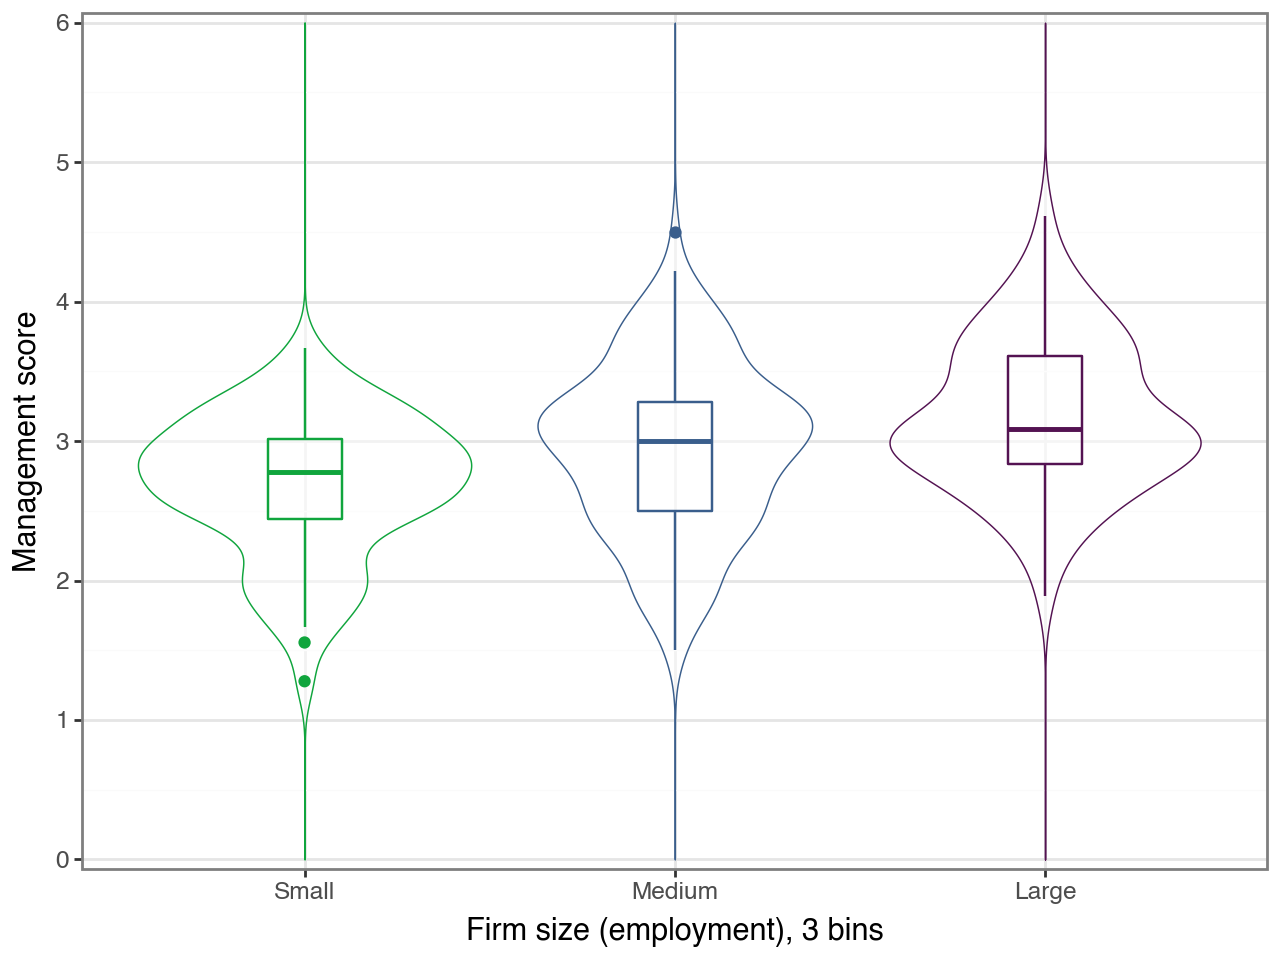

In [51]:
(
    ggplot(
        df,
        aes(x="emp3bins", y="management", color="emp3bins", group="emp3bins"),
    )
    + geom_violin(size=0.3, alpha=0.5, trim=False, show_legend=False, na_rm=True)
    + geom_boxplot(size=0.5, width=0.2, alpha=0.3, na_rm=True)
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_color_manual(values=(color[1], color[0], color[2]))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 6, 1))
    + guides(fill=False, color=False)
    + theme_bw()
)

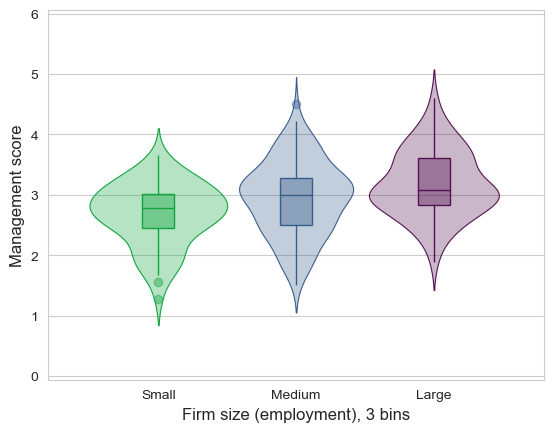

In [52]:
fig, ax = plt.subplots()
sns.violinplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    inner_kws={"marker": "o"},
    width=1,
    linewidth=0.8,
    inner=None,
)

violin_line_col = [color[1], color[0], color[2]]
for i, violin_col in enumerate(violin_line_col):
    mybox = ax.collections[i]
    mybox.set_facecolor(mpl.colors.to_rgba(violin_col, 0.3))
    mybox.set_edgecolor(violin_col)

sns.boxplot(
    data=df,
    x="emp3bins",
    y="management",
    ax=ax,
    width=0.23,
    showcaps=False,
    flierprops={"marker": "o"},
)

box_line_col = [color[1], color[0], color[2]]
for i, box_col in enumerate(box_line_col):
    mybox = ax.patches[i]
    mybox.set_facecolor(mpl.colors.to_rgba(box_col, 0.4))
    mybox.set_edgecolor(box_col)
    for j in range(i * 4, i * 4 + 4):
        line = ax.lines[j]
        line.set_color(box_col)
        line.set_mfc(mpl.colors.to_rgba(box_col, 0.4))
        line.set_mec(mpl.colors.to_rgba(box_col, 0.4))

plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.yticks(seq(0, 6, 1))
add_margin(ax, x=0.1, y=0.01)
plt.show()

In [53]:
# Correlation
df["management"].corr(df["emp_firm"])

0.30199539572479067

In [54]:
# by industry
df.loc[df["sic"] <= 21, "industry_broad"] = "food_drinks_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad"
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] < 37), "industry_broad"] = "electronics"
df.loc[df["sic"] == 37, "industry_broad"] = "auto"
df.loc[df["sic"] >= 38, "industry_broad"] = "other"

In [55]:
df["industry_broad"].value_counts()


industry_broad
chemicals_etc                  69
materials_metals               50
textile_apparel_leather_etc    38
wood_furniture_paper           37
electronics                    36
food_drinks_tobacco            34
auto                           26
other                          10
Name: count, dtype: int64

In [56]:
# Correlation
df.groupby("industry_broad")[["management", "emp_firm"]].corr().iloc[0::2, -1]


industry_broad                         
auto                         management    0.502322
chemicals_etc                management    0.053380
electronics                  management    0.282000
food_drinks_tobacco          management    0.052144
materials_metals             management    0.320921
other                        management    0.628398
textile_apparel_leather_etc  management    0.360877
wood_furniture_paper         management    0.294981
Name: emp_firm, dtype: float64

In [57]:
(
    df.loc[df["industry_broad"].notna(), ["management", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("management", "min"),
        Max=("management", "max"),
        SD=("management", np.std),
        Median=("management", "median"),
        n=("management", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,2.278,4.278,0.553,3.194,26
chemicals_etc,1.278,4.111,0.550,3.000,69
electronics,1.500,4.500,0.693,3.111,36
food_drinks_tobacco,1.889,4.222,0.526,2.833,34
materials_metals,1.556,4.278,0.565,2.861,50
other,1.778,4.611,0.844,3.556,10
textile_apparel_leather_etc,1.778,4.000,0.567,2.778,38
wood_furniture_paper,1.722,3.556,0.556,2.833,37


In [58]:
(
    df.loc[df["industry_broad"].notna(), ["emp_firm", "industry_broad"]]
    .groupby("industry_broad")
    .agg(
        Min=("emp_firm", "min"),
        Max=("emp_firm", "max"),
        SD=("emp_firm", np.std),
        Median=("emp_firm", "median"),
        n=("emp_firm", "size"),
    )
    .round(3)
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,130.0,5000.0,1625.104,500.0,26
chemicals_etc,116.0,2000.0,465.981,356.0,69
electronics,115.0,5000.0,1126.787,295.0,36
food_drinks_tobacco,120.0,2400.0,665.626,471.0,34
materials_metals,100.0,5000.0,1151.437,335.0,50
other,200.0,2900.0,867.247,350.0,10
textile_apparel_leather_etc,110.0,4000.0,899.413,350.0,38
wood_furniture_paper,100.0,3500.0,855.610,300.0,37


In [59]:
# Correlation
cor = (
    df.groupby("industry_broad")[["management", "emp_firm"]]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .drop(["level_1"], axis=1)
    .set_index("industry_broad")
    .rename({"emp_firm": "correlation"}, axis=1)
)
cor.round(3)

,correlation
industry_broad,
auto,0.502
chemicals_etc,0.053
electronics,0.282
food_drinks_tobacco,0.052
materials_metals,0.321
other,0.628
textile_apparel_leather_etc,0.361
wood_furniture_paper,0.295


In [60]:
table41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)
table41["Corr"] = cor["correlation"]

In [61]:
table41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electronics",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table41.round(3)


,Mean,Obs,Corr
Auto,3.254,26,0.502
Chemicals,2.969,69,0.053
"Machinery, equipment, electronics",3.145,36,0.282
"Food, drinks, tobacco",2.871,34,0.052
"Materials, metals",2.849,50,0.321
"Textile, apparel, leather",3.289,10,0.628
"Wood, furniture, paper",2.769,38,0.361
Other,2.722,37,0.295


In [62]:
last_row = (
    table41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), Corr=("Corr", "mean"))
    .reset_index(drop=True)
)
last_row.index = ["All"]
table41 = pd.concat([table41, last_row])

In [63]:
table41 = table41.filter(["Corr", "Mean", "Obs"]).reset_index()
table41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [64]:
table41.round(2)


,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.50,3.25,26
1,Chemicals,0.05,2.97,69
2,"Machinery, equipment, electronics",0.28,3.15,36
3,"Food, drinks, tobacco",0.05,2.87,34
4,"Materials, metals",0.32,2.85,50
5,"Textile, apparel, leather",0.63,3.29,10
6,"Wood, furniture, paper",0.36,2.77,38
7,Other,0.29,2.72,37
8,All,0.31,2.98,300



## Chapter 03 plots
---------------------------------------------------------------

In [66]:
df2 = df.loc[df["emp3bins"] == "Small", ["emp3bins", "management"]]

In [67]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
ub = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df2.loc[df2["management"] >= q1 - 1.5 * iqr, "management"])
out_lb = min(df2["management"])
min = min(df["management"])
max = max(df["management"])


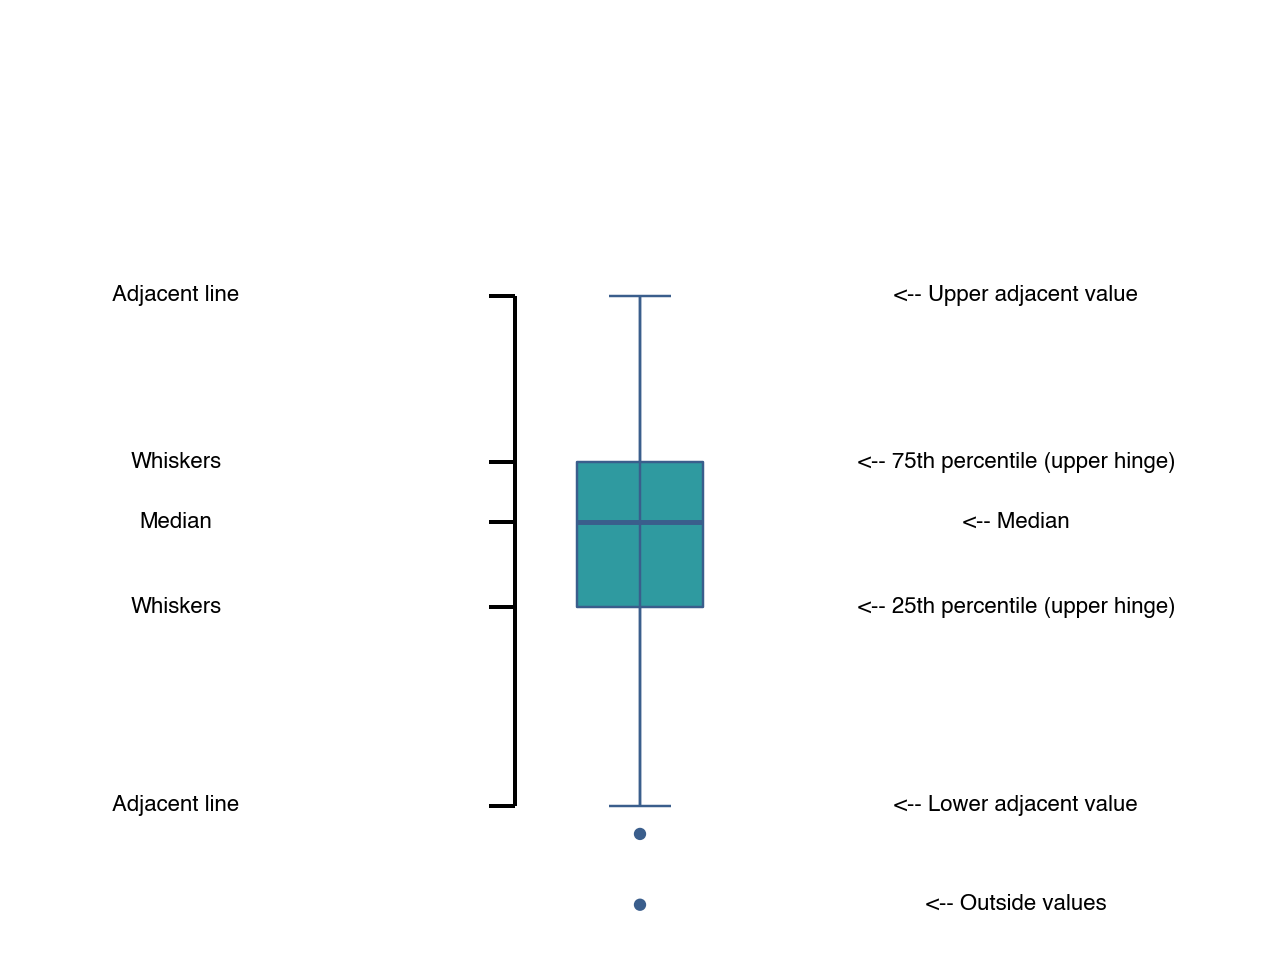

In [68]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_boxplot(
        color=color[0], fill=color[4], size=0.5, width=0.1, alpha=0.5, na_rm=True
    )
    + stat_boxplot(geom="errorbar", width=0.05, color=color[0], size=0.5, na_rm=True)
    + scale_y_continuous(limits=(min, max))
    + annotate("text", x=1.3, y=ub, label="<-- Upper adjacent value", size=8)
    + annotate("text", x=1.3, y=q3, label="<-- 75th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=q2, label="<-- Median", size=8)
    + annotate("text", x=1.3, y=q1, label="<-- 25th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=lb, label="<-- Lower adjacent value", size=8)
    + annotate("text", x=1.3, y=out_lb, label="<-- Outside values", size=8)
    + annotate("text", x=0.63, y=ub, label="Adjacent line", size=8)
    + annotate("text", x=0.63, y=q3, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=q2, label="Median", size=8)
    + annotate("text", x=0.63, y=q1, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=lb, label="Adjacent line", size=8)
    + geom_segment(aes(x=0.9, y=lb, xend=0.9, yend=ub))
    + geom_segment(aes(x=0.88, y=lb, xend=0.9, yend=lb))
    + geom_segment(aes(x=0.88, y=q1, xend=0.9, yend=q1))
    + geom_segment(aes(x=0.88, y=q2, xend=0.9, yend=q2))
    + geom_segment(aes(x=0.88, y=q3, xend=0.9, yend=q3))
    + geom_segment(aes(x=0.88, y=ub, xend=0.9, yend=ub))
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)

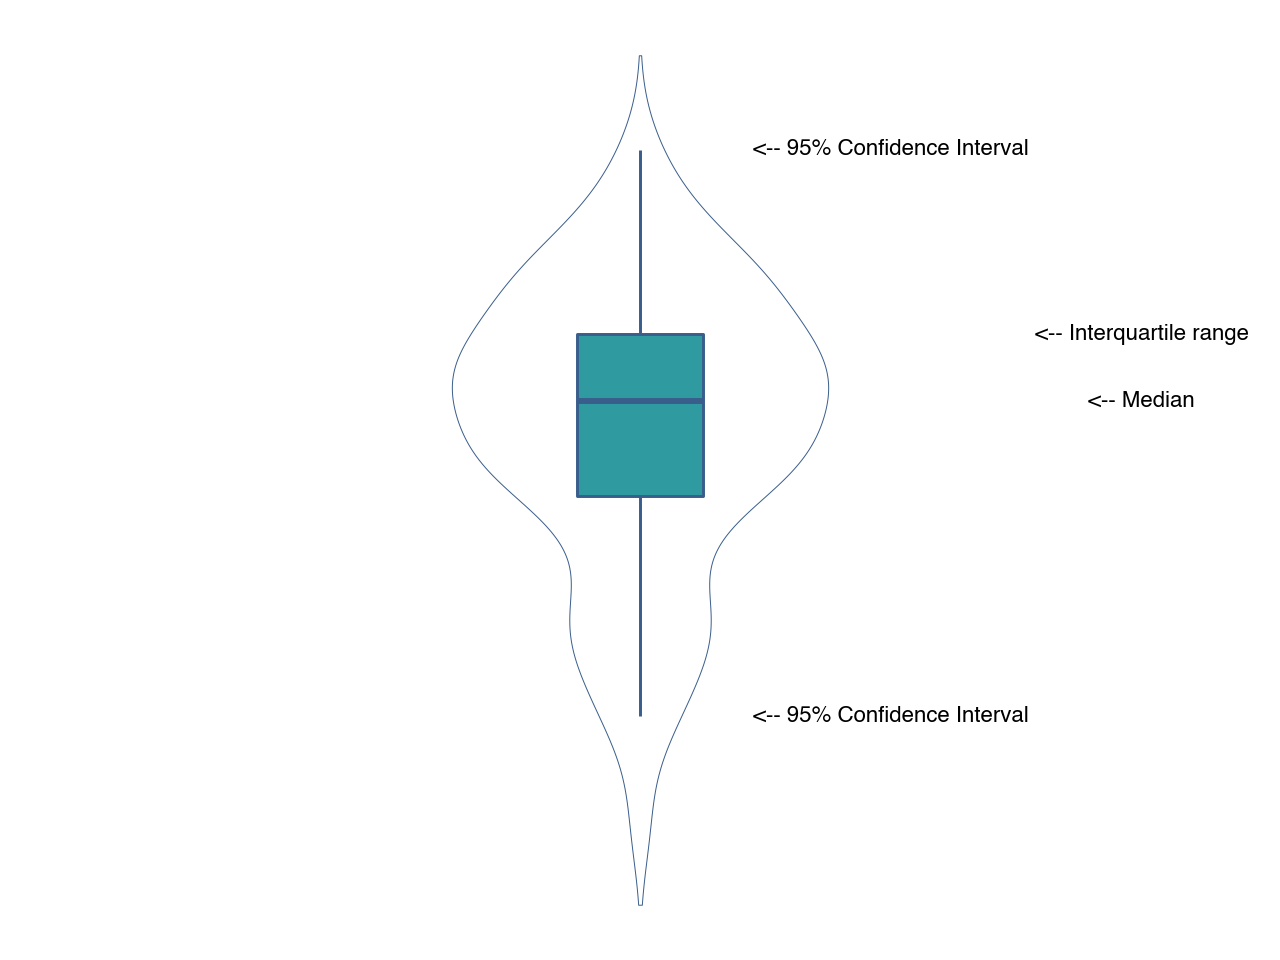

In [69]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_violin(
        size=0.2,
        width=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
        color=color[0],
        alpha=0.3,
    )
    + geom_boxplot(
        color=color[0],
        fill=color[4],
        size=0.6,
        width=0.1,
        alpha=0.5,
        na_rm=True,
        outlier_color="",
    )
    + annotate("text", x=1.2, y=ub, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.2, y=lb, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.4, y=q3, label="<-- Interquartile range", size=8)
    + annotate("text", x=1.4, y=q2, label="<-- Median", size=8)
    + ylim(1, 4)
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)